In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from PIL import Image
from torchvision.datasets import DatasetFolder
import torchvision
from tqdm.notebook import tqdm as tqdm
from torchsampler import ImbalancedDatasetSampler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [2]:
semi = [0.27586,0.42759,0.45517,0.41379,0.45517,0.42069,0.42759,0.37241,0.50345,0.46207,0.44138,0.43448,0.48966,0.48276,0.40000,0.44828,0.51724,0.45517,0.44828,0.49655,0.41379,0.40000,0.51035,0.46207,0.46207,0.51724,0.44138,0.46897,0.45517,0.42069,0.48276,0.54483,0.45517,0.47586,0.44138,0.48966,0.49655,0.45517,0.50345,0.53793,0.50345,0.45517,0.50345,0.48966,0.53103,0.47586,0.42759,0.55862, 0.46897,0.56552]
# VGG = [0.13793106377124786, 0.20000006258487701, 0.24827595055103302, 0.26206904649734497, 0.310344934463501, 0.2758621573448181, 0.2551724910736084, 0.28965526819229126, 0.3517242670059204, 0.24827595055103302, 0.3310346007347107, 0.34482771158218384, 0.29655182361602783, 0.36551737785339355, 0.3793104887008667, 0.3793104887008667, 0.3724139332771301, 0.3241380453109741, 0.38620704412460327, 0.39310359954833984, 0.33793115615844727, 0.41379326581954956, 0.34482771158218384, 0.42068982124328613, 0.39310359954833984, 0.39310359954833984, 0.4482760429382324, 0.406896710395813, 0.4000001549720764, 0.4000001549720764, 0.44137948751449585, 0.42068982124328613, 0.39310359954833984, 0.41379326581954956, 0.4275863766670227, 0.4000001549720764, 0.4000001549720764, 0.4482760429382324, 0.44137948751449585, 0.44137948751449585, 0.41379326581954956, 0.4344829320907593, 0.46206915378570557, 0.455172598361969, 0.455172598361969, 0.4275863766670227, 0.4275863766670227, 0.3793104887008667, 0.4827588200569153, 0.4344829320907593]
# VGG = [0.13793106377124786, 0.13793106377124786, 0.2827587127685547, 0.2275862842798233, 0.39310359954833984, 0.3310346007347107, 0.310344934463501, 0.3517242670059204, 0.36551737785339355, 0.41379326581954956, 0.39310359954833984, 0.358620822429657, 0.3724139332771301, 0.3517242670059204, 0.4000001549720764, 0.4000001549720764, 0.3793104887008667, 0.44137948751449585, 0.4344829320907593, 0.3793104887008667, 0.33793115615844727, 0.4827588200569153, 0.38620704412460327, 0.358620822429657, 0.4482760429382324, 0.46206915378570557, 0.42068982124328613, 0.4965519309043884, 0.4758622646331787, 0.46896570920944214, 0.44137948751449585, 0.46206915378570557, 0.503448486328125, 0.4758622646331787, 0.503448486328125, 0.4758622646331787, 0.4758622646331787, 0.4758622646331787, 0.46206915378570557, 0.48965537548065186, 0.48965537548065186, 0.46896570920944214, 0.4827588200569153, 0.4965519309043884, 0.5103450417518616, 0.48965537548065186, 0.4965519309043884, 0.5448278188705444, 0.5448278188705444, 0.5103450417518616]
VGG = [0.06896551698446274, 0.13793106377124786, 0.20000006258487701, 0.23448283970355988, 0.2068966180086136, 0.29655182361602783, 0.3310346007347107, 0.26896560192108154, 0.29655182361602783, 0.28965526819229126, 0.34482771158218384, 0.34482771158218384, 0.358620822429657, 0.358620822429657, 0.3517242670059204, 0.358620822429657, 0.3310346007347107, 0.3241380453109741, 0.39310359954833984, 0.36551737785339355, 0.3724139332771301, 0.3724139332771301, 0.358620822429657, 0.3724139332771301, 0.38620704412460327, 0.4344829320907593, 0.39310359954833984, 0.3310346007347107, 0.3310346007347107, 0.42068982124328613, 0.310344934463501, 0.38620704412460327, 0.3724139332771301, 0.31724148988723755, 0.2758621573448181, 0.4827588200569153, 0.42068982124328613, 0.4344829320907593, 0.34482771158218384, 0.3793104887008667, 0.4000001549720764, 0.3724139332771301, 0.406896710395813, 0.46206915378570557, 0.406896710395813, 0.4827588200569153, 0.358620822429657, 0.4482760429382324, 0.358620822429657, 0.358620822429657]
simple_CNN = [0.13793,0.26897,0.29655,0.26207,0.36552,0.31034,0.22759,0.32414,0.34483,0.31724,0.31034,0.37241,0.33103,0.37241,0.39310,0.36552,0.33103,0.37931,0.43448,0.33793,0.38621,0.33793,0.44138,0.42069,0.37241,0.44138,0.44828,0.43448,0.45517,0.38621,0.48276,0.43448,0.36552,0.46207,0.46207,0.44828,0.42759,0.44138,0.47586,0.45517,0.42759,0.44828,0.43448,0.45517,0.48276,0.44828,0.46207,0.46897,0.47586,0.44828]

In [3]:
len(simple_CNN)

50

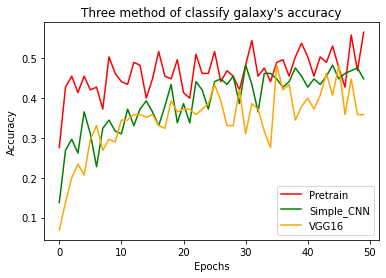

In [6]:
plt.figure(1)
plt.title('Three method of classify galaxy\'s accuracy')
semi_l, = plt.plot(semi, color = 'red')
simple_l, = plt.plot(simple_CNN, color = 'green')
vgg_l, = plt.plot(VGG, color = 'orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(handles = [semi_l, simple_l, vgg_l], labels = ['Pretrain', 'Simple_CNN', 'VGG16'], loc = 'best')
plt.show()